In [6]:
%run ../includes/common-20230414.ipynb

CPython 2024-01-15T08:20:19.763399


CPU times: user 0 ns, sys: 666 µs, total: 666 µs
Wall time: 681 µs


In [7]:
%%time
dfc_raw = get_df()

CPU times: user 5.18 s, sys: 1.43 s, total: 6.61 s
Wall time: 6.61 s


In [8]:
dfs_01 = get_data(dfc_raw, default_sample_ratio=.1)

9065


/tmp/ipykernel_7124/3317348687.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  best_pf_option_ = best_pf_option.idxmin(skipna=skipna)
/tmp/ipykernel_7124/3317348687.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  best_pf_option_ = best_pf_option.idxmin(skipna=skipna)


In [9]:
df_01f = sampleright(dfs_01['exp34_canon'], idx=['ShortLabel', 'Target Write Rate', 'Target DWPD'])

# Page 1 graph

ShortLabel
Baleen                 28.1%
Baleen (No Prefetch)   31.6%
CoinFlip               34.6%
RejectX                31.9%
Name: P100ServiceTimeUtil@10m, dtype: float64

ShortLabel
Baleen                 13.7%
Baleen (No Prefetch)   13.5%
CoinFlip               15.2%
RejectX                14.3%
Name: P50ServiceTimeUtil@10m, dtype: float64

ShortLabel
Baleen                 14.0%
Baleen (No Prefetch)   13.9%
CoinFlip               15.6%
RejectX                14.7%
Name: MeanServiceTimeUtil, dtype: float64

ShortLabel
Baleen                 40.6%
Baleen (No Prefetch)   45.0%
CoinFlip               49.1%
RejectX                46.8%
Name: P100ServiceTimePercent@10m, dtype: float64

ShortLabel
Baleen                 64.0%
Baleen (No Prefetch)   63.8%
CoinFlip               71.3%
RejectX                67.4%
Name: P50ServiceTimePercent@10m, dtype: float64

ShortLabel
Baleen                 59.5%
Baleen (No Prefetch)   59.7%
CoinFlip               67.1%
RejectX                63.5%
Name: MeanServiceTimeUsedPercent, dtype: float64

ShortLabel
Baleen                 49.5%
Baleen (No Prefetch)   52.9%
CoinFlip               61.8%
RejectX                57.4%
Name: IO miss rate (%), dtype: float64

ShortLabel
Baleen                 65.1%
Baleen (No Prefetch)   62.7%
CoinFlip               68.8%
RejectX                65.8%
Name: Byte miss rate (%), dtype: float64

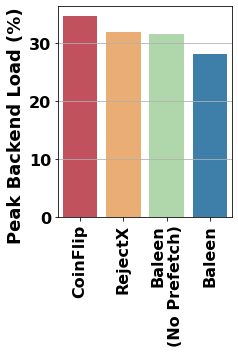

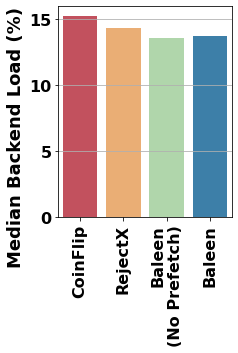

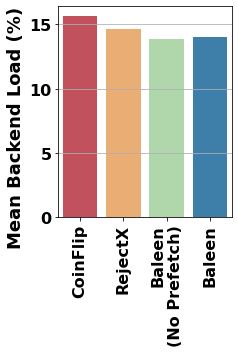

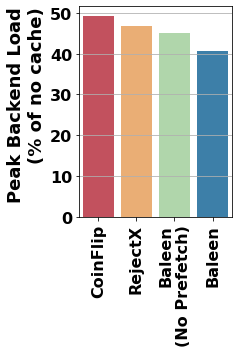

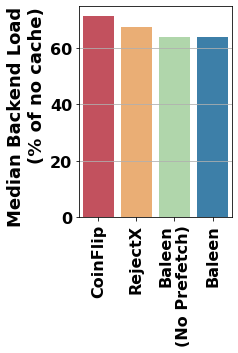

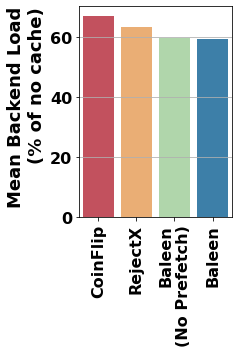

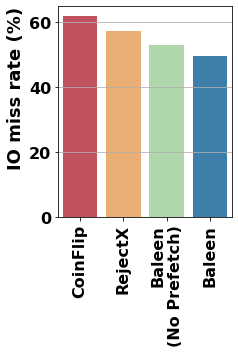

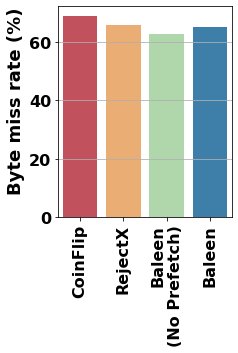

In [10]:
def showstats(df_summary, y, order=['CoinFlip', 'RejectX', 'Baleen'], points=True, **kwargs):
    with pd.option_context('display.float_format', '{:,.1f}%'.format):
        palette = dict(maps.SHORT_COLORMAP)
        drt2 = df_summary
        g = sns.barplot(df_summary, x="ShortLabel", y=y,
                        linewidth=10,
                        # capsize=.3,
                        errorbar=None,
                        order=order, palette=palette)
        display(df_summary.groupby("ShortLabel")[y].mean())
        if points:
            for patch in g.patches:
                clr = patch.get_facecolor()
                patch.set_edgecolor(clr)
                patch.set_facecolor((0,0,0,0))
            sns.stripplot(df_summary, x="ShortLabel", y=y, hue="RegionLabel",
                          size=10,linewidth=0, dodge=True, order=order)
        plt.ylabel(y, loc='top')
        plt.xlabel("")
        # plt.ylim(0, 100)
        locs, labels = plt.xticks()
        plt.xticks(locs, [x.replace("Baleen (No Prefetch)", "Baleen\n(No Prefetch)") for x in order],
                   va='center', ha='right', rotation_mode='anchor', rotation=90)
        plt.grid(True, axis='y')
        if points:
            sns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1, 1), title="Trace")


for savel, y in figlabels.items():
    contexts.use('paper')
    plt.figure(figsize=(6.4/2, 4.8), layout="constrained")
    showstats(df_01f, y=y, order=['CoinFlip', 'RejectX', 'Baleen (No Prefetch)', 'Baleen'], points=False, verbose=0)
    plt.ylabel(niceylabel[y], loc='top')
    savefig("summary", f"{savel}_wr-34-01")